In [1]:
from qiskit.transpiler import PassManager
from qiskit_ibm_transpiler.ai.routing import AIRouting
from qiskit.circuit.library import EfficientSU2, QFT
import logging

logging.getLogger("qiskit_ibm_transpiler").setLevel(logging.DEBUG)

## Let's get the ibm_fez coupling map 

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService

backend = QiskitRuntimeService().backend("ibm_fez")
fez_coupling_map = backend.coupling_map

## Create circuits

### EfficientSU2

Original su2_circuit -> Depth: 104, Gates(2q): 100


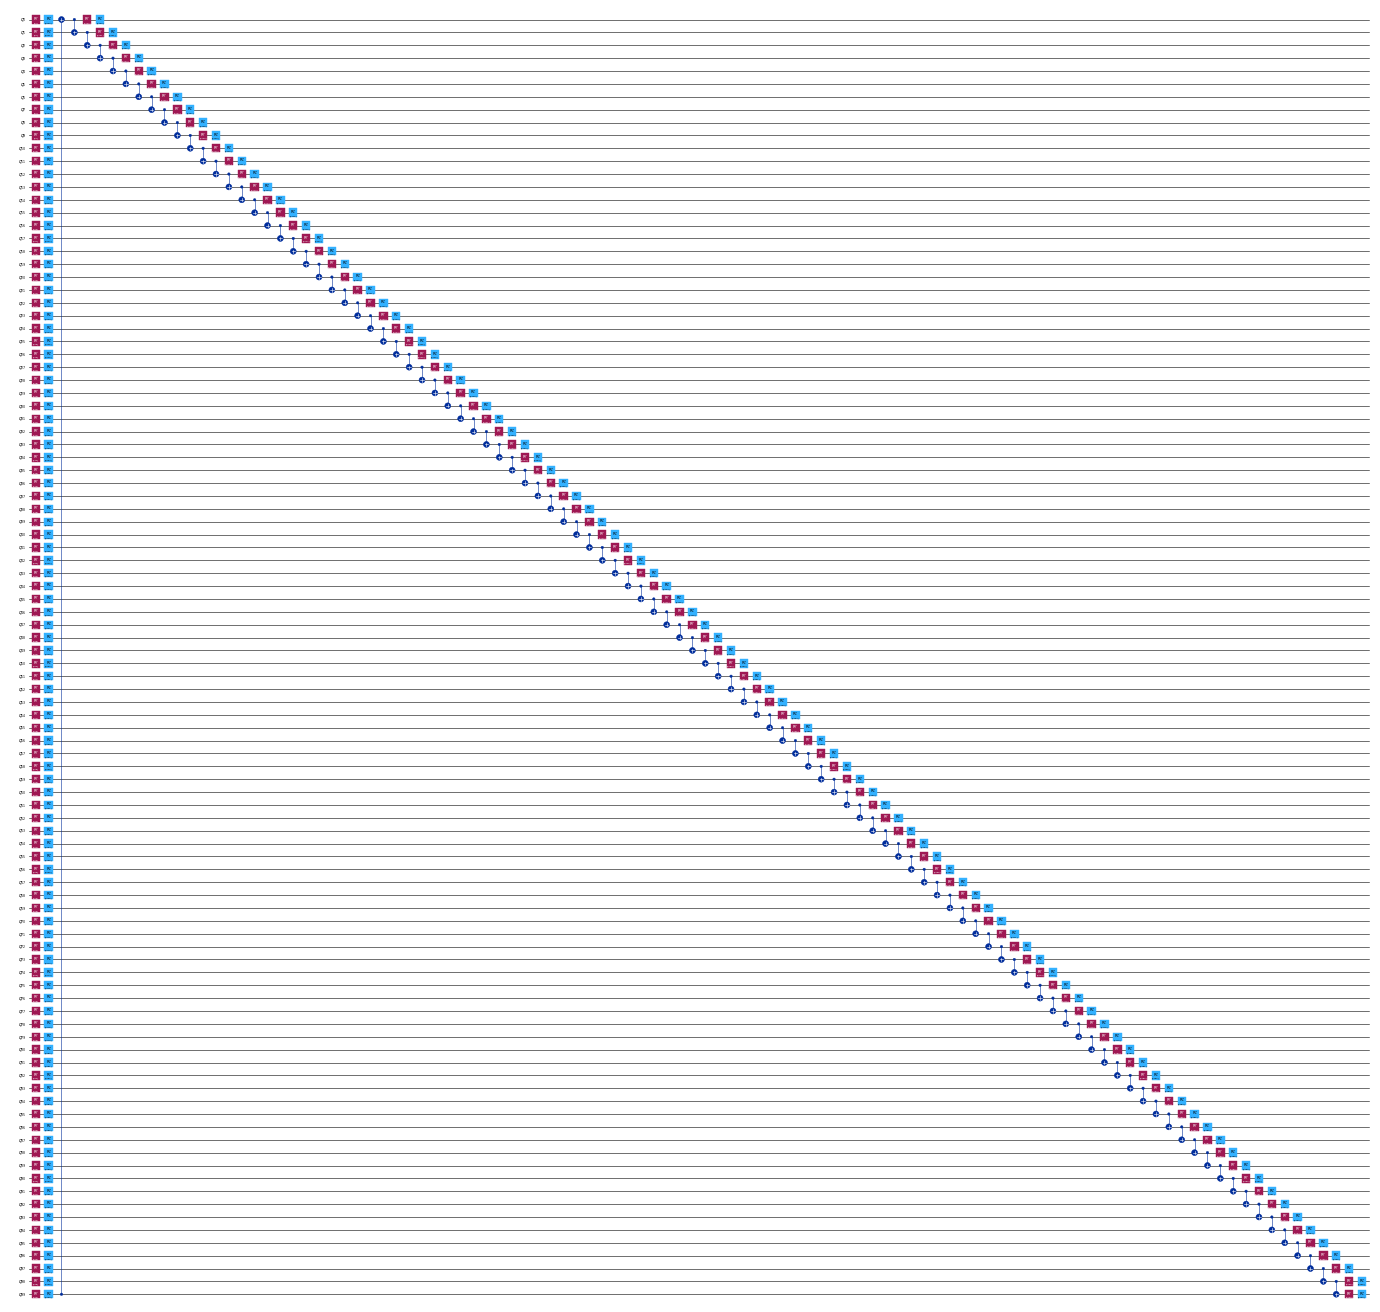

In [3]:
su2_circuit = EfficientSU2(100, entanglement="circular", reps=1).decompose()
print(
    f"Original su2_circuit -> Depth: {su2_circuit.depth()}, Gates(2q): {su2_circuit.num_nonlocal_gates()}"
)
su2_circuit.draw(output="mpl", fold=-1, scale=0.2, style="iqp")

### QFT

Original qft_circuit -> Depth: 100, Gates(2q): 1250


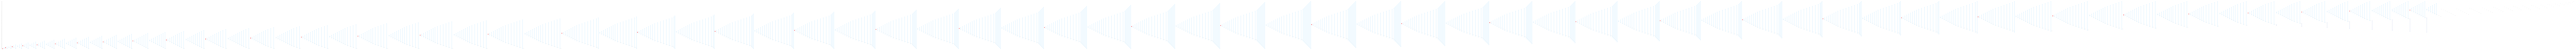

In [4]:
qft_circuit = QFT(50).decompose()
print(
    f"Original qft_circuit -> Depth: {qft_circuit.depth()}, Gates(2q): {qft_circuit.num_nonlocal_gates()}"
)
qft_circuit.draw(output="mpl", fold=-1, scale=0.2, style="iqp")

## Optimize the circuit

#### With Qiskit AI Transpiler

In [5]:
ai_transpiler = PassManager(
    [
        AIRouting(
            coupling_map=fez_coupling_map, optimization_level=1, layout_mode="optimize"
        )
    ]
)

ai_su2_transpiled_circuit = ai_transpiler.run(su2_circuit)

ai_qft_transpiled_circuit = ai_transpiler.run(qft_circuit)

DEBUG:qiskit_ibm_transpiler.wrappers.ai_local_routing:Running local routing inference
DEBUG:qiskit_ibm_transpiler.wrappers.ai_local_routing:Local routing inference completed
DEBUG:qiskit_ibm_transpiler.wrappers.ai_local_routing:Running local routing inference
DEBUG:qiskit_ibm_transpiler.wrappers.ai_local_routing:Local routing inference completed


In [6]:
print(
    f"Qiskit AI SU2 Transpiler -> Depth: {ai_su2_transpiled_circuit.depth()}, Gates(2q): {ai_su2_transpiled_circuit.num_nonlocal_gates()}"
)

# ai_su2_transpiled_circuit.draw(output="mpl", fold=-1, scale=0.2, style="iqp")

print(
    f"Qiskit AI QFT Transpiler -> Depth: {ai_qft_transpiled_circuit.depth()}, Gates(2q): {ai_qft_transpiled_circuit.num_nonlocal_gates()}"
)

Qiskit AI SU2 Transpiler -> Depth: 295, Gates(2q): 294
Qiskit AI QFT Transpiler -> Depth: 599, Gates(2q): 3623


In [7]:
print(
    f"Qiskit AI SU2 Transpiler -> Depth: {ai_su2_transpiled_circuit.depth()}, Gates(2q): {ai_su2_transpiled_circuit.num_nonlocal_gates()}"
)

# ai_su2_transpiled_circuit.draw(output="mpl", fold=-1, scale=0.2, style="iqp")

print(
    f"Qiskit AI QFT Transpiler -> Depth: {ai_qft_transpiled_circuit.depth()}, Gates(2q): {ai_qft_transpiled_circuit.num_nonlocal_gates()}"
)

Qiskit AI SU2 Transpiler -> Depth: 295, Gates(2q): 294
Qiskit AI QFT Transpiler -> Depth: 599, Gates(2q): 3623


In [8]:
print(
    f"Qiskit AI SU2 Transpiler -> Depth: {ai_su2_transpiled_circuit.depth()}, Gates(2q): {ai_su2_transpiled_circuit.num_nonlocal_gates()}"
)

# ai_su2_transpiled_circuit.draw(output="mpl", fold=-1, scale=0.2, style="iqp")

print(
    f"Qiskit AI QFT Transpiler -> Depth: {ai_qft_transpiled_circuit.depth()}, Gates(2q): {ai_qft_transpiled_circuit.num_nonlocal_gates()}"
)

Qiskit AI SU2 Transpiler -> Depth: 295, Gates(2q): 294
Qiskit AI QFT Transpiler -> Depth: 599, Gates(2q): 3623


#### With Qiskit lvl3 Transpiler (local)

In [9]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

qiskit_lvl3_transpiler = generate_preset_pass_manager(
    optimization_level=3, coupling_map=fez_coupling_map
)

lvl3_su2_transpiled_circuit = qiskit_lvl3_transpiler.run(su2_circuit)

lvl3_qft_transpiled_circuit = qiskit_lvl3_transpiler.run(qft_circuit)

In [10]:
print(
    f"Qiskit lvl3 SU2 Transpiler -> Depth: {lvl3_su2_transpiled_circuit.depth()}, Gates(2q): {lvl3_su2_transpiled_circuit.num_nonlocal_gates()}"
)

# lvl3_su2_transpiled_circuit.draw(output="mpl", fold=-1, scale=0.2, style="iqp")

print(
    f"Qiskit lvl3 QFT Transpiler -> Depth: {lvl3_qft_transpiled_circuit.depth()}, Gates(2q): {lvl3_qft_transpiled_circuit.num_nonlocal_gates()}"
)

Qiskit lvl3 SU2 Transpiler -> Depth: 104, Gates(2q): 100
Qiskit lvl3 QFT Transpiler -> Depth: 460, Gates(2q): 2718


In [13]:
from qiskit_ibm_transpiler.ai import generate_ai_pass_manager

ai_transpiler_pass_manager = generate_ai_pass_manager(
    coupling_map=fez_coupling_map,
    ai_optimization_level=3,
    optimization_level=3,
    ai_layout_mode="optimize",
)

ai_su2_full_transpiled_circuit = ai_transpiler_pass_manager.run(su2_circuit)

ai_qft_full_transpiled_circuit = ai_transpiler_pass_manager.run(qft_circuit)

DEBUG:qiskit_ibm_transpiler.wrappers.ai_local_routing:Running local routing inference
DEBUG:qiskit_ibm_transpiler.wrappers.ai_local_routing:Local routing inference completed


In [14]:
print(
    f"Qiskit AI SU2 Full Transpiler -> Depth: {ai_su2_full_transpiled_circuit.depth()}, Gates(2q): {ai_su2_full_transpiled_circuit.num_nonlocal_gates()}"
)

# ai_su2_transpiled_circuit.draw(output="mpl", fold=-1, scale=0.2, style="iqp")

print(
    f"Qiskit AI QFT Full Transpiler -> Depth: {ai_qft_full_transpiled_circuit.depth()}, Gates(2q): {ai_qft_full_transpiled_circuit.num_nonlocal_gates()}"
)

Qiskit AI SU2 Full Transpiler -> Depth: 104, Gates(2q): 100
Qiskit AI QFT Full Transpiler -> Depth: 376, Gates(2q): 2813
